In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Text(0.5,1,'Milstein Strong')

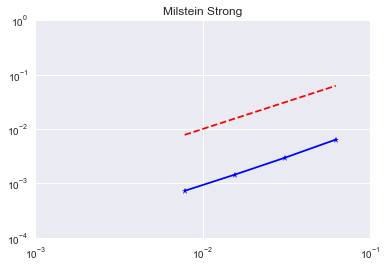

In [2]:
np.random.seed(100)
r=2 
K=1 
beta=0.25 
Xzero=0.5
T=1 
N=2**11 
dt=float(T)/N
M=500
R = np.array([1, 16, 32,64, 128])
dW = np.sqrt(dt)*np.random.randn(M,N) 
Xmil = np.zeros((M,5))
for p in range(5):
    Dt=R[p]*dt;
    L=float(N)/R[p]
    Xtemp=Xzero*np.ones(M)
    for j in range (1, int(L)+1):
        Winc=np.sum(dW[:,range(R[p]*(j-1), R[p]*j)], axis=1) #range(start, stop, step)
        Xtemp = Xtemp+ Dt*r*Xtemp*(K-Xtemp) + beta*Xtemp*Winc+ 0.5*beta**2*Xtemp*(np.power(Winc,2)-Dt)
    
    Xmil[:,p]=Xtemp
    
Xref=Xmil[:,0]
Xerr=np.abs(Xmil[:, range(1,5)]-np.tile(Xref, [4,1]).T)
Dtvals=dt*R[1:5]

plt.loglog(Dtvals,np.mean(Xerr,0),'b*-')
plt.loglog(Dtvals,Dtvals,'r--')
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.title('Milstein Strong')